# AllLife Credit Card Customer Segmentation
### Background: 

AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.

### Objective: 

To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

# EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import packages to use in EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Import packages to use in Unsupervised Learning
from sklearn.cluster import KMeans
from scipy.stats import zscore

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

In [2]:
# Import data from excel file
data_og = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
# Review data from imported file
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
data_og.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
data_og.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
# Detect missing values in any columns
data_og.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# Check for duplicate columns, which there is none
data_og.duplicated().sum()

0

In [8]:
# Review how many unique values there are for each column
for i in data_og.columns:
    print("{0} unique values count = {1}".format(i, data_og[i].unique().shape[0]))

Sl_No unique values count = 660
Customer Key unique values count = 655
Avg_Credit_Limit unique values count = 110
Total_Credit_Cards unique values count = 10
Total_visits_bank unique values count = 6
Total_visits_online unique values count = 16
Total_calls_made unique values count = 11


In [9]:
# Review Duplicates in "Customer Key"
data_og[data_og['Customer Key'].duplicated(keep=False)].sort_values(by=['Customer Key'])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


#### Assessment of duplicates
- Sl_No is the primary key of the data with all entries having unique values (equals 660 entries). I will drop this columns as it adds no value in assessment
- Customer Key has 5 duplicated entries out of 660, might be input error. More information from the bank is required on the semantics of this columns

In [10]:
data = data_og.drop(['Sl_No'], axis=1)
data.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

#### Uni-variate Analysis

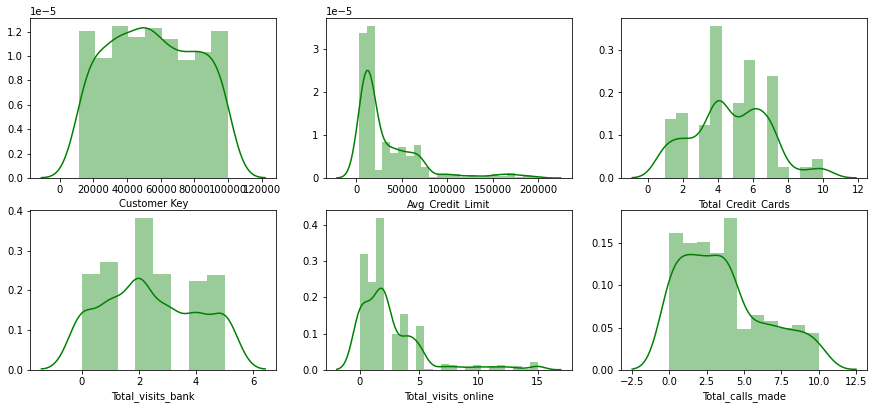

In [11]:
# Plot Distplot of variables
plt.figure(figsize=(15, 10))
p = 1
for i in data.columns:
    plt.subplot(3, 3, p)
    sns.distplot(data[i], color='green')
    p += 1 

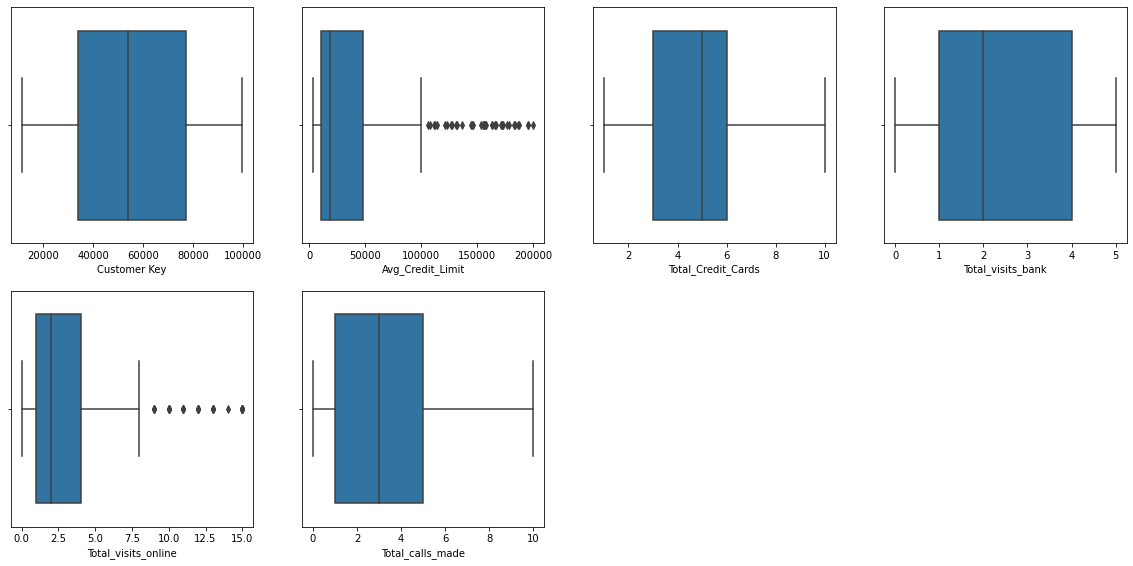

In [12]:
# Box Plots to show distribution of all columns
plt.figure(figsize=(20, 20))
p = 1
for i in data.columns:
    plt.subplot(4, 4, p)
    sns.boxplot(data[i])
    p += 1 

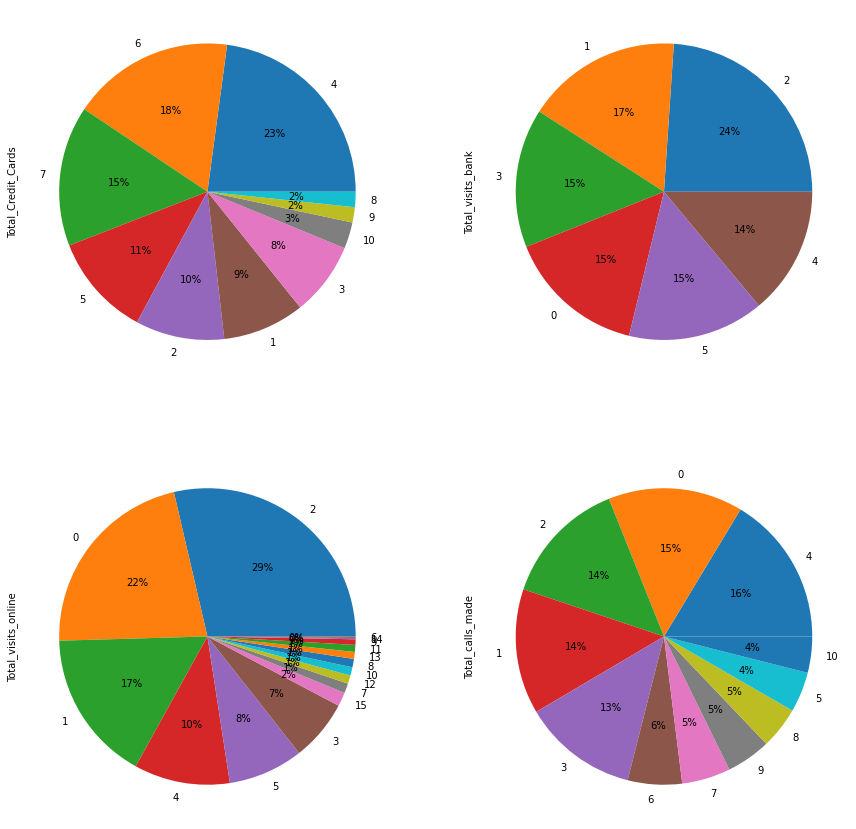

In [13]:
# Pie charts to show distribution of specific columns Total_XX_YY
plt.figure(figsize=(20, 20))
p = 1
for i in data[['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].columns:
    plt.subplot(2, 2, p)
    data[i].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15, 15))
    p += 1 

#### Uni-variate Assessment Comments
- Avg_Credit_Limit has a positive skew, with outliers which are expected as some customers tend to have a high credit limit tend to take up credit cards
- Total_Credit_Cards - most customers have 4,6&7 credit cards, while customers having 1,2,3 is approximately 10% credit cards each, with customers having 8,9,10 credit cards at approximately 2.5% each. These appear to be 3 segments
- Total_visits_bank - the highest frequency is 2 visits at 24% and 1,3,4,5 visits are done at 14-17%. These appear to be 2 segments
- Total_visits_online - aproximately 68% of clients make between 0 to 2 online visits, while 25% make between 3 to 5 online visits, and 7% make above 6 online visits. There are some outliers above 8, which is probably genuine customer data given online nature. These appear to be 3 segments
- Total_calls_made - aproximately 72% of clients make between 0 to 4 calls, while 28% make between 5 to 10 calls. These appear to be 2 segments

#### Bi-variate Analysis

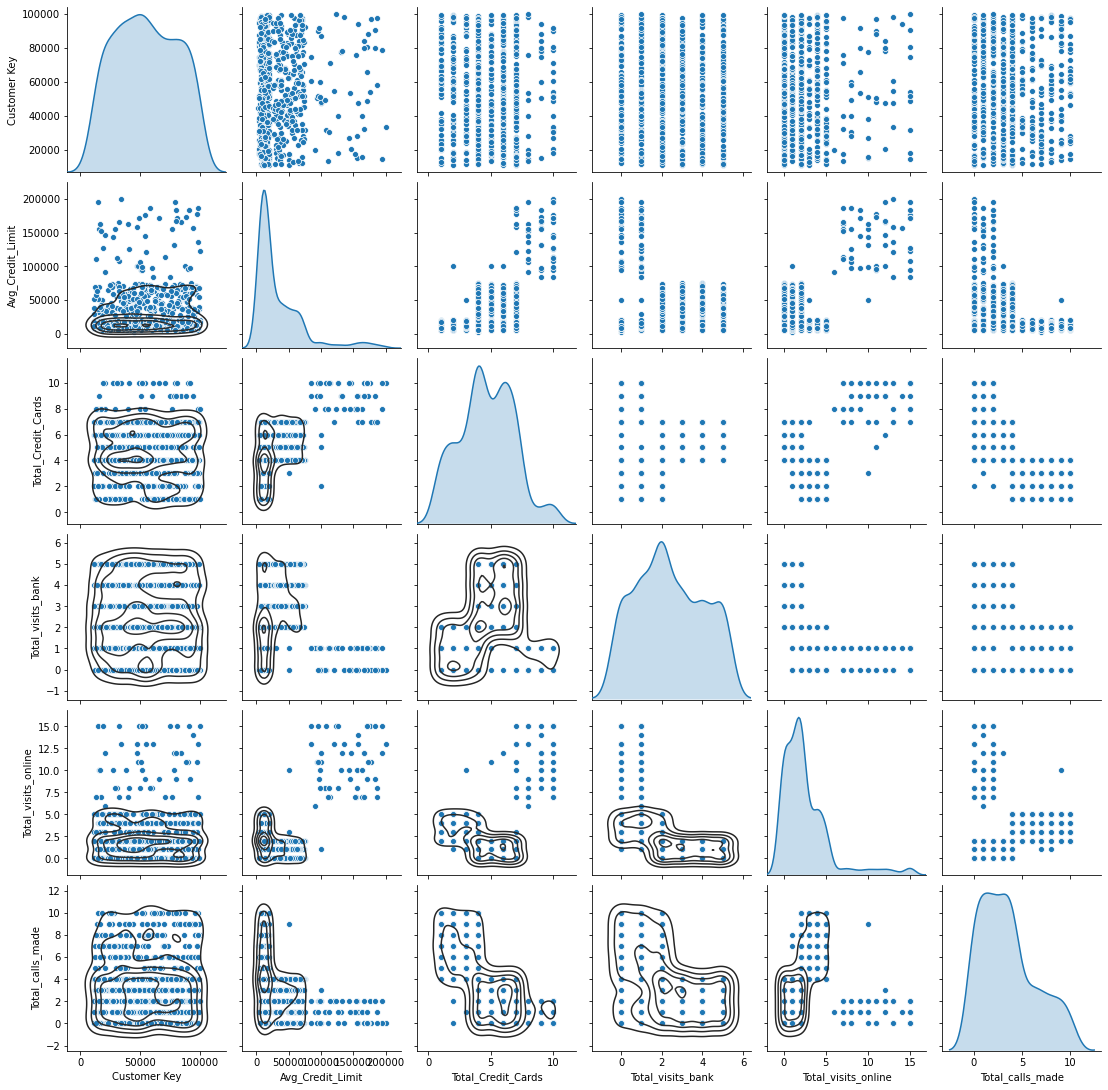

In [14]:
graph = sns.pairplot(data, diag_kind='kde')
graph.map_lower(sns.kdeplot, levels=5, color='0.2')

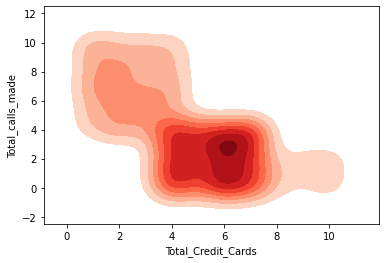

In [15]:
sns.kdeplot(data['Total_Credit_Cards'], data['Total_calls_made'], color='red', shade=True,
            cmap="Reds", shade_lowest=False)

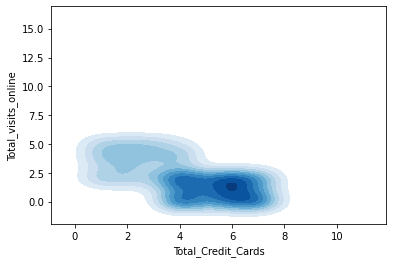

In [16]:
sns.kdeplot(data['Total_Credit_Cards'], data['Total_visits_online'], color='blue', shade=True,
            cmap="Blues", shade_lowest=False)

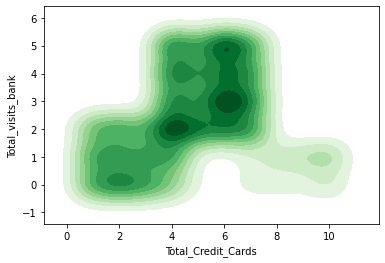

In [17]:
sns.kdeplot(data['Total_Credit_Cards'], data['Total_visits_bank'], color='green', shade=True,
            cmap="Greens", shade_lowest=False)

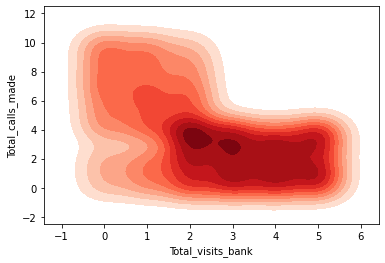

In [18]:
sns.kdeplot(data['Total_visits_bank'], data['Total_calls_made'], color='red', shade=True,
            cmap="Reds", shade_lowest=False)

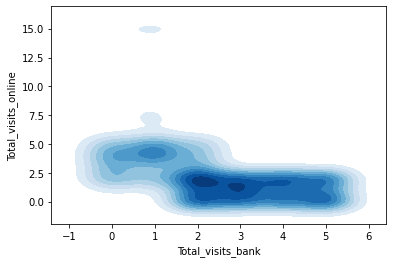

In [19]:
sns.kdeplot(data['Total_visits_bank'], data['Total_visits_online'], color='blue', shade=True,
            cmap="Blues", shade_lowest=False)

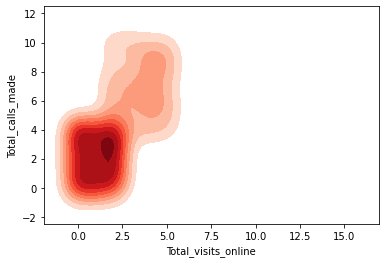

In [20]:
sns.kdeplot(data['Total_visits_online'], data['Total_calls_made'], color='red', shade=True,
            cmap="Reds", shade_lowest=False)

#### Bi-variate Assessment Comments

1. Pairplot Diagonal Histogram/KDE
    - Total_Credit_Cards - There appears to be aproximately 3 or 4 gaussians/segments
    - Total_visits_bank - There appears to be aproximately 2 gaussians/segments
    - Total_visits_online  - There appears to be aproximately 3 gaussians/segments
    - Total_calls_made -  - There appears to be aproximately 2 gaussians/segments
    - Total_visits_online & Avg_Credit_Limit have a positive skew

2. Pairplot between variables & kdeplots, reveals possible relationships below
    - Total_Credit_Cards & Total_calls_made - relationship appears loosely negatively correlated, barring outliers
    - Total_Credit_Cards & Total_visits_online - relationship appears loosely negatively correlated, barring outliers
    - Total_Credit_Cards & Total_visits_bank - relationship appears loosely positively correlated, barring outliers
    - Total_visits_bank & Total_calls_made - relationship appears loosely negatively correlated, barring outliers
    - Total_visits_bank & Total_visits_online - relationship appears loosely negatively correlated, barring outliers
    - Total_visits_online & Total_calls_made - relationship appears loosely positively correlated, barring outliers

3.  Customer Key & Avg_Credit_Limit do not appear to be correlated to other variables

# KMeans & its Silhouette Score

In [21]:
# Scale original data using zscore to remove weighting bias of larger variables
dataSc = data.apply(zscore)

In [22]:
# Review of dataframe after scaling data using zscore
dataSc.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [23]:
# Finding optimal no. of clusters using elbox method
from scipy.spatial.distance import cdist
meanDistortions = []
clusters = []
clusterNum = range(1, 10)

for k in clusterNum:
    modelK = KMeans(n_clusters=k, random_state=3)
    modelK.fit(dataSc)
    clusters.append(modelK)
    
    prediction = modelK.predict(dataSc)
    meanDistortions.append(sum(np.min(cdist(dataSc, modelK.cluster_centers_, 'euclidean'), axis=1)) / dataSc.shape[0])

In [24]:
# Calculate Silhouette score for each count of cluster total
silScores = pd.DataFrame(columns=['Num_Cluster', 'Silhouette_Score_KMeans'])
for k in range(1, 9):
    silScores = silScores.append({'Num_Cluster': clusters[k].n_clusters, 
                                  'Silhouette_Score_KMeans': silhouette_score(dataSc, clusters[k].predict(dataSc))}, ignore_index=True)
silScores

,Num_Cluster,Silhouette_Score_KMeans
0,2.0,0.338172
1,3.0,0.417743
2,4.0,0.322891
3,5.0,0.285086
4,6.0,0.254221
5,7.0,0.242890
6,8.0,0.226862
7,9.0,0.208041


Text(0.5, 1.0, 'Optimal K using Elbow Method')

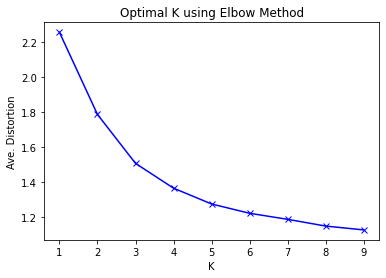

In [25]:
# Plot cluster size vs Average Distortion
plt.plot(clusterNum, meanDistortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Ave. Distortion')
plt.title('Optimal K using Elbow Method')

In [26]:
# Use optimal K 4, based on silhouete score tapering off after 0.322891 
modelK2 = KMeans(4, random_state=3)
modelK2.fit(dataSc)
data['ClassKM'] = modelK2.predict(dataSc)
dataSc['ClassKM'] = modelK2.predict(dataSc)

In [27]:
# Show "normalised value" cluster centers of each of the 4 ClassKM classes
pd.DataFrame(modelK2.cluster_centers_, columns=['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.774835,-0.105212,0.341822,0.645651,-0.537976,-0.531886
1,0.010595,-0.596610,-1.062913,-0.904453,0.322314,1.152605
2,0.061203,2.831764,1.862226,-1.105763,2.827319,-0.874330
3,0.937016,0.081840,0.409457,0.687012,-0.567309,-0.575342


In [28]:
# Review of dataframe after adding 4 ClassKM classes
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,ClassKM
0,87073,100000,2,1,1,0,3
1,38414,50000,3,0,10,9,1
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,2


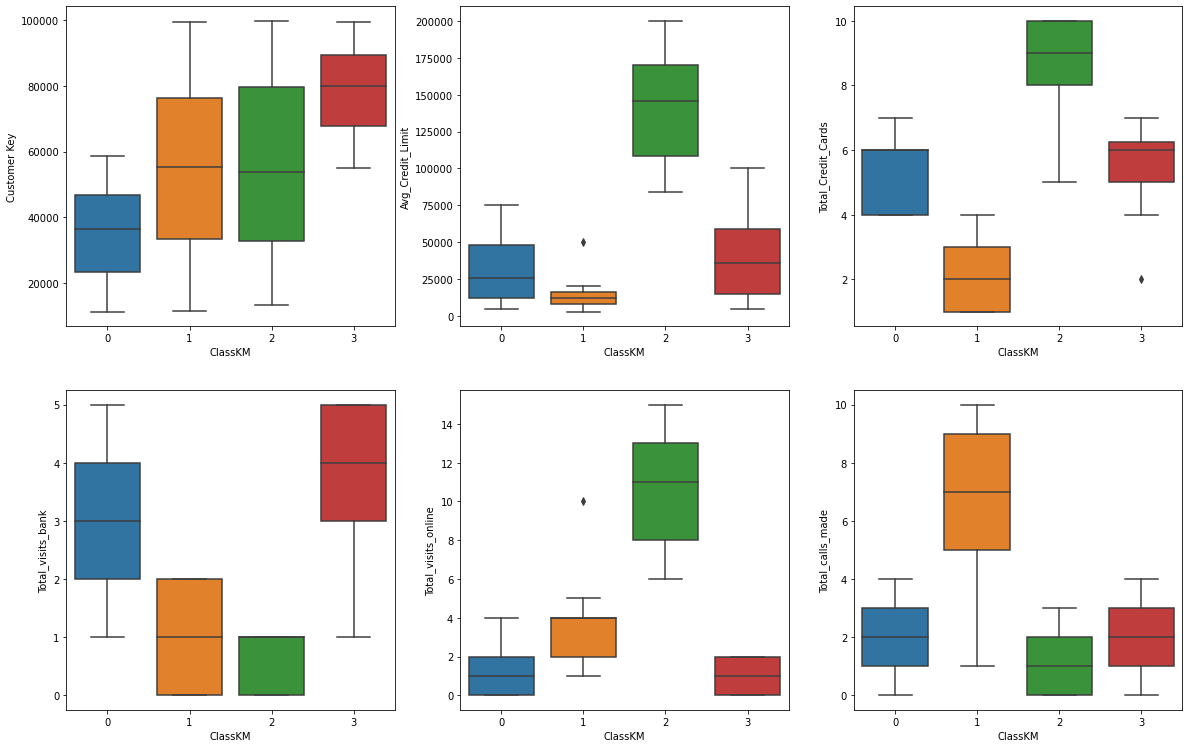

In [29]:
# Box Plots to show distribution of 4 ClassKM classes
plt.figure(figsize=(20, 20))
p = 1
for i in data[['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].columns:
    plt.subplot(3, 3, p)
    sns.boxplot(x='ClassKM', y=data[i], data=data)
    p += 1 

#### Analysis of KMeans Clusters' Boxplots
1. Class 2 are customers with highest Avg_Credit_Limit (80000 and above) and high Total_Credit_Cards (5 or greater). They do 6 or greater Total_visits_online and have 0 or 1 Total_visits_bank
2. Class 1 are customers with the lowest Avg_Credit_Limit (20000 and below) with the least Total_Credit_Cards of 4 or less
3. Class 0 and 3 Total_visits_bank are at least once to 5 times, with less than 3 Total_visits_online, as well as less than or equal to 4 Total_calls_made. These are mailny distinguished by Customer Key, where Class 3 has greater than 60000, while Class 0 has less than 60000

# Hierarchical Clustering & its Silhouette Score

In [30]:
# Iterate different linkage methods and choose the one with the highest Cophonetic Co-effecient

for i in ['single','complete','average','ward','median','centroid']:
    linkHC = linkage(dataSc, metric='euclidean', method=i)
    coph_cc_c, coph_dist_c = cophenet(linkHC, pdist(dataSc))
    print('Method {}, Cophonetic Co-effecient is {}'.format(i, coph_cc_c))

Method single, Cophonetic Co-effecient is 0.8202947688418201
Method complete, Cophonetic Co-effecient is 0.8667058433702878
Method average, Cophonetic Co-effecient is 0.8950023702398913
Method ward, Cophonetic Co-effecient is 0.7735671004495599
Method median, Cophonetic Co-effecient is 0.7777349024236814
Method centroid, Cophonetic Co-effecient is 0.8902593636415299


In [31]:
# Set linkage using average linkage method
linkHC = linkage(dataSc, metric='euclidean', method='average')

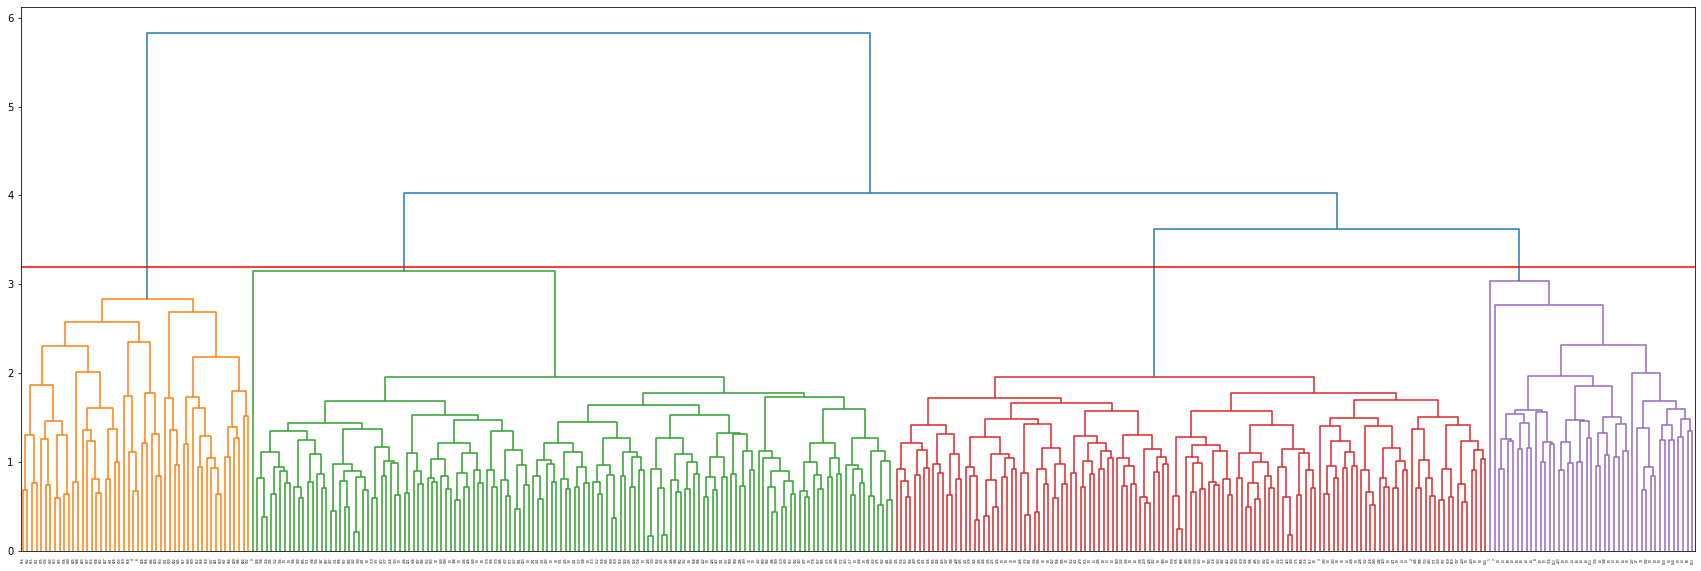

In [32]:
# Draw Dendogram, with chosen average linkage method
plt.figure(figsize=(30,10))
dendrogram(
    linkHC,
    truncate_mode='level',
    p=10,
    color_threshold=3.2,
    leaf_font_size=3
)
plt.axhline(y=3.2, color='red')
plt.show()

- At color_threshold=3.2, we have 4 well formed clusters with a low dendogramic distance between the cluster formation points. Hence 4 clusters may be ideal. Confirmation shall be given in conjunction with silhouette score as well

In [33]:
clustersHC = []
clusterNum = range(1, 10)

for k in clusterNum:
    modelHC = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    modelHC.fit_predict(dataSc)
    clustersHC.append(modelHC)

In [34]:
# Append Silhouette Score to silScores Dataframe, for each count of cluster total
silScoresHC = pd.DataFrame(columns=['Num_Cluster', 'Silhouette_Score_HC'])
for k in range(1, 9):
    silScoresHC = silScoresHC.append({'Num_Cluster': clustersHC[k].n_clusters, 
                                  'Silhouette_Score_HC': silhouette_score(dataSc, clustersHC[k].fit_predict(dataSc))}, ignore_index=True)

silScores['Silhouette_Score_HC'] = silScoresHC['Silhouette_Score_HC']

In [35]:
# Chosen cluster size for Hierarchical Clustering is 4, which is a local maxima with silhouette score of 0.488987
silScores

,Num_Cluster,Silhouette_Score_KMeans,Silhouette_Score_HC
0,2.0,0.338172,0.357413
1,3.0,0.417743,0.406522
2,4.0,0.322891,0.488987
3,5.0,0.285086,0.423991
4,6.0,0.254221,0.329469
5,7.0,0.242890,0.244872
6,8.0,0.226862,0.230843
7,9.0,0.208041,0.208285


In [36]:
# Agglomerative Clustering Model with 4 clusters, using highest cophenet index 'average'
modelHC2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
modelHC2.fit(dataSc)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [37]:
# Review of dataframe after adding 4 ClassHC classes
data['ClassHC'] = modelHC2.labels_
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,ClassKM,ClassHC
0,87073,100000,2,1,1,0,3,0
1,38414,50000,3,0,10,9,1,2
2,17341,50000,7,1,3,4,0,3
3,40496,30000,5,1,1,4,0,3
4,47437,100000,6,0,12,3,2,1


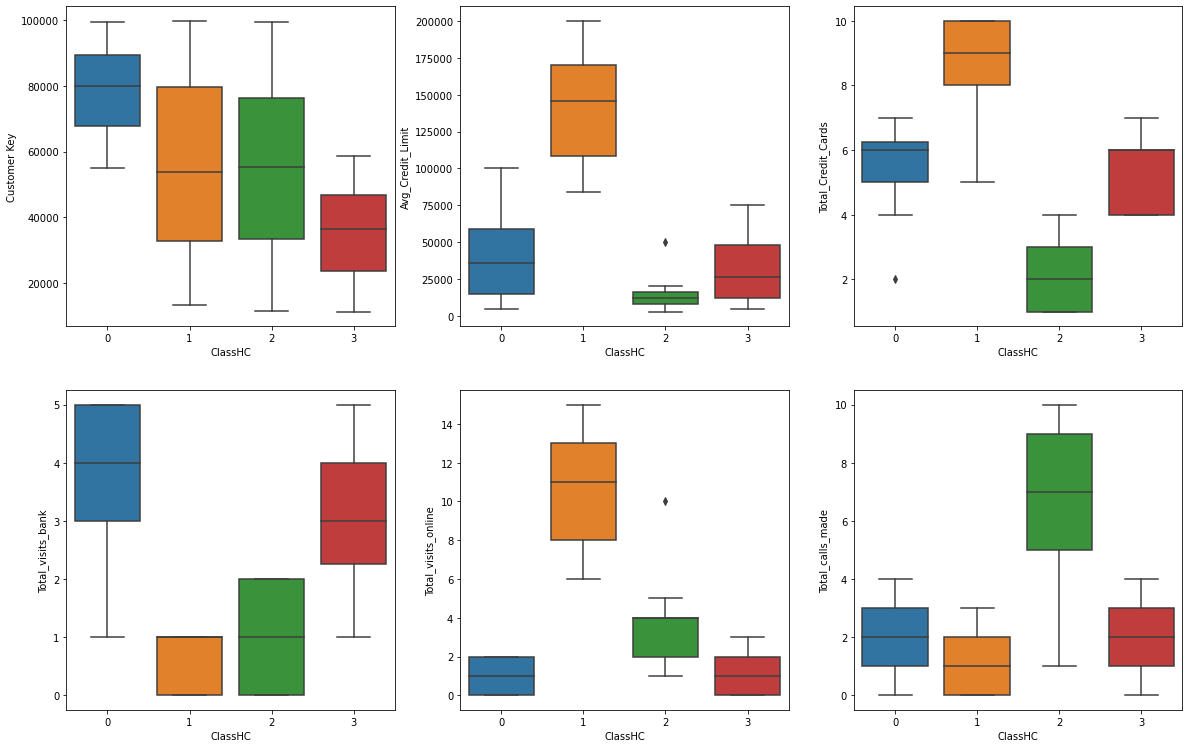

In [38]:
# Box Plots to show distribution of 4 ClassKM classes
plt.figure(figsize=(20, 20))
p = 1
for i in data[['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].columns:
    plt.subplot(3, 3, p)
    sns.boxplot(x='ClassHC', y=data[i], data=data)
    p += 1 

#### Analysis of Hierarchical Clustering Boxplots
1. Class 1 are customers with highest Avg_Credit_Limit (80000 and above) and high Total_Credit_Cards (5 or greater). They do 6 or greater Total_visits_online and have 0 or 1 Total_visits_bank
2. Class 2 are customers with the lowest Avg_Credit_Limit (20000 and below) with the least Total_Credit_Cards of 4 or less
3. Class 0 and 3 Total_visits_bank are at least once to 5 times, with less than 3 Total_visits_online, as well as less than or equal to 4 Total_calls_made. These are mailny distinguished by Customer Key, where Class 0 has greater than 60000, while Class 3 has less than 60000

# Clusters Comparison

In [39]:
# Show Silhouette Scores
silScores

,Num_Cluster,Silhouette_Score_KMeans,Silhouette_Score_HC
0,2.0,0.338172,0.357413
1,3.0,0.417743,0.406522
2,4.0,0.322891,0.488987
3,5.0,0.285086,0.423991
4,6.0,0.254221,0.329469
5,7.0,0.242890,0.244872
6,8.0,0.226862,0.230843
7,9.0,0.208041,0.208285


In [40]:
print('Average silhouette score for KMeans Clustering is {}'.format(silScores['Silhouette_Score_KMeans'].mean()))

Average silhouette score for KMeans Clustering is 0.2869884598869461


In [41]:
print('Average silhouette score for Hierarchical Clustering is {}'.format(silScores['Silhouette_Score_HC'].mean()))

Average silhouette score for Hierarchical Clustering is 0.33629773416052927


#### Review of KMeans Clustering

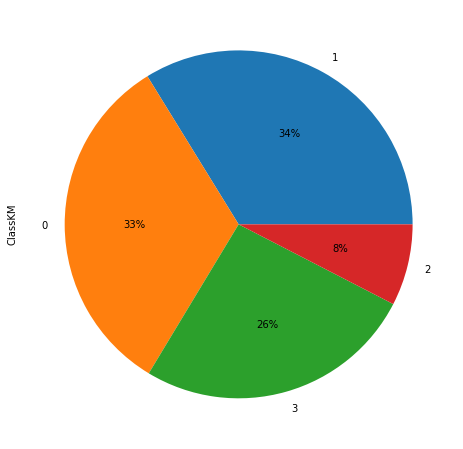

In [42]:
# Pie chart of 4 KMeans Class' distribution
data['ClassKM'].value_counts(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(8, 8))
plt.show()

#### Review of Hierarchical Clustering

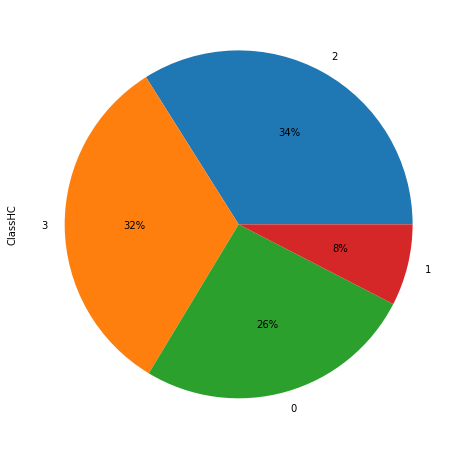

In [43]:
# Pie chart of 4 Hierarchical Clustering Class' distribution
data['ClassHC'].value_counts(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(8, 8))
plt.show()

In [44]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,ClassKM,ClassHC
0,87073,100000,2,1,1,0,3,0
1,38414,50000,3,0,10,9,1,2
2,17341,50000,7,1,3,4,0,3
3,40496,30000,5,1,1,4,0,3
4,47437,100000,6,0,12,3,2,1


In [45]:
# Compare Class Distribution between KMeans and Hierarchical Clustering
pd.crosstab(data['ClassKM'], data['ClassHC'])

ClassHC,0,1,2,3
ClassKM,,,,
0,0,0,1,214
1,0,0,223,0
2,0,50,0,0
3,172,0,0,0


#### PCA for visualisation of KMeans and Hierarchical Clusters

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
prinComp = pca.fit_transform(dataSc)
X_std = pd.DataFrame(data=prinComp, columns=['pc1', 'pc2'])

#### Hierarchical Clustering Visualisation

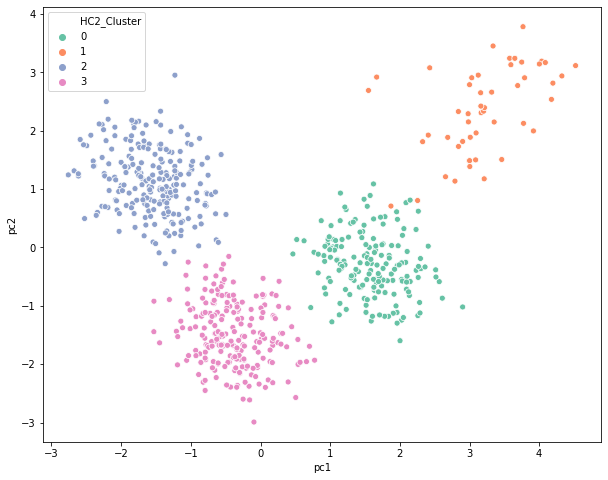

In [47]:
X_std['HC2_Cluster'] = modelHC2.labels_
X_std.head()
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_std.pc1, y=X_std.pc2, hue=X_std.HC2_Cluster, palette="Set2")

#### KMeans Clustering Visualisation

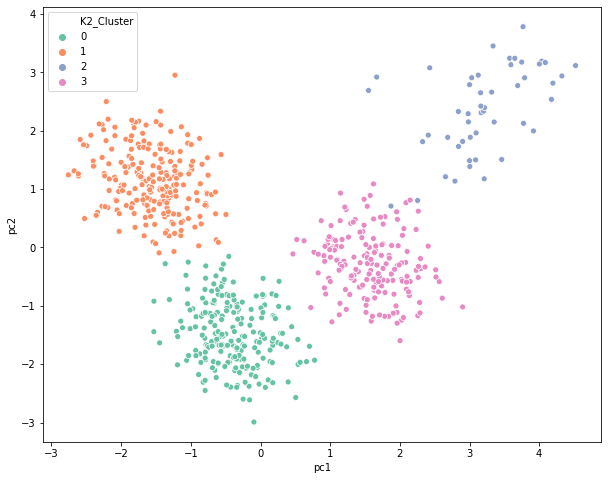

In [48]:
X_std['K2_Cluster'] = modelK2.labels_
X_std.head()
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_std.pc1, y=X_std.pc2, hue=X_std.K2_Cluster, palette="Set2")

#### Comparison of KMeans and Hierarchical Clustering
1. Both KMeans and Hierarchical Clustering separated the clients into the same 4 clusters as seen in the crosstab of ClassKM & ClassHC. This is confirmed in the pairplots generated being identical. This is also confirmed by the pie charts, as well as the PCA scatterplots. Only 1 entry was not categorised the same with ClassKM=0 while ClassHC=2
2. Both KMeans and Hierarchical clustering, segmented the customers pretty well, as per PCA visualisation showing well separated clusters. The only exception is a slight overlap (2 customers) in KMeans cluster 0 & 1, which is similarly depicted in Hierarchical Clustering cluster 2 & 3
3. KMeans class mapping to Hierachical respectively are 0=>3, 1=>2, 2=>1, 3=>0
4. Average silhouette score for KMeans Clustering is 0.287, while the average silhouette score for Hierarchical Clustering is 0.336. This highlights that Hierarchical clustering is slightly better than KMeans, however a different random_state value of Kmeans may change the default cluster centers and result in a better silhouette score.


# Analysis the Clusters formed

Text(0.5, 1.0, 'Pairplot with 4 x Kmeans Classes')

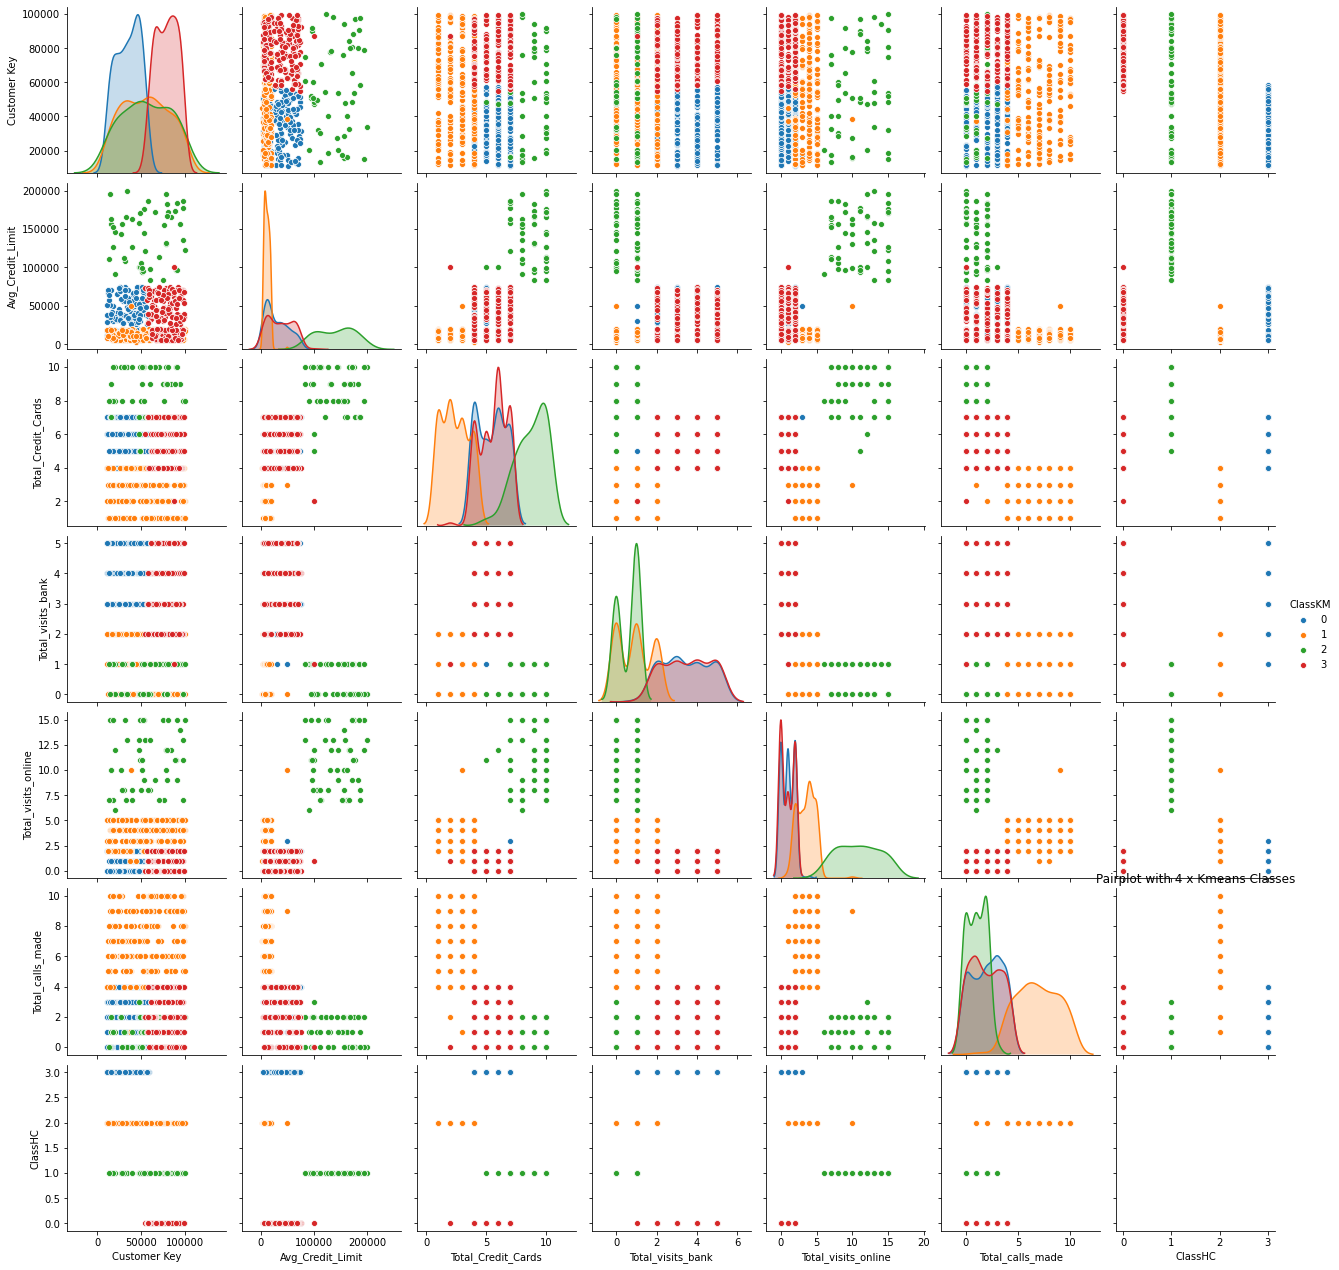

In [49]:
# Pairplot of variables with a hue of the 4 KMeans classes
sns.pairplot(data, hue='ClassKM')
plt.title('Pairplot with 4 x Kmeans Classes')

In [ ]:
# Pairplot of variables with a hue of the 4 Hierarchical Clustering classes
sns.pairplot(data, hue='ClassHC')
plt.title('Pairplot with 4 x Hierarchical Clustering Classes')

1. How many different segments of customers are there?
    - There are 4 customer segments (limits extracted from pairplots above with hue=ClassKM/ClassHC)
        1. Mapping of Segments to Hierarchical Clustering (ClassHC) & Kmeans (ClassKM):
            - Segment 1 is ClassHC=1, ClassKM=2
            - Segment 2 is ClassHC=2, ClassKM=1
            - Segment 3 is ClassHC=0, ClassKM=3
            - Segment 4 is ClassHC=3, ClassKM=0
        2. Segment 1 has high Avg_Credit_Limit (80000 and above) and high Total_Credit_Cards (5 or greater), and has total 50 common clients between Hierarchical Clustering & Kmeans
        3. Segment 2 has low Avg_Credit_Limit (20000 and below) and low Total_Credit_Cards (4 or less), and has total 223 common clients between Hierarchical Clustering & Kmeans
        4. Segment 3 & 4 have low to average Avg_Credit_Limit. They also have Total_visits_bank that are at least once to 5 times, with less than 3 Total_visits_online, as well as less than or equal to 4 Total_calls_made. These are mailny distinguished by Customer Key, where Segment 3 has greater than 60000, while Segment 4 has less than 60000
            - Segment 3 has total 172 common clients between Hierarchical Clustering & Kmeans
            - Segment 4 has total 214 common clients between Hierarchical Clustering & Kmeans
2. How are these segments different from each other?
    - Segments 1 & 2 are different, so are 1 & 3, 1 & 4, 2 & 3, finally 2 & 4, per the analysis given in 1B, 1C, 1D above
    - Segments 3 and 4 are similar only separated by Customer Key of greater than 60000 and less than 60000 respectively
    
3. What are your recommendations to the bank on how to better market to and service these customers?
    - Segment 1 - these customers are mainly online and online campaigns will better target them, were they frequent. We can classify these as high value customers to the bank (interest accrued gained from high number of credit cards per customer)
    - Segment 1 - given the high credit card limits and total credit cards that these customers use, it is advisable for the bank to come up with electronic tools (e.g. app) for these customers to gain visibility and management of credit card spend of these custmer
    - Segment 2 - these customers make the most calls into the bank. Given they are comfortable with calling, the bank can market to them using Music on Hold campaigns, use their unique identifier to route their calls to special agents, as well as outbound dialer campaigns can be targeted at them. This will assist increase their credit card spend, as they have on average the lowest number of credit cards and average credit limit. Therefore we classify these customers as low value customers (low interest accrued per customer)
    - Segment 3 & 4 - these customers visit the bank, out of all the segments. Relationship bankers and tellers can market offers and service these customers, as well as physical fliers can be handed out to these. These customers also make calls into the bank and promotional Music on hold, as well as outbound dialer campaigns can be targeted at them. We can classify these customers as typical retail customers
    - Segment 3 & 4 feature the highest number of customers (172+214 = 386), which is 58% (386/660). Given they visit the bank the most, as well as place calls, it is advisable to educate and promote electronic communication to these segments, which would be cheaper for both the bank and the customer. It is also advisable to analyse their reasomns for visiting or calling, so that these may be created in electronic media like website and chat bots